In [285]:
import sox
from matplotlib import pyplot as plt
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft

FILE = '/Users/sam/Downloads/Bass-Drum-1.wav'
OFILE = './processed.wav'

In [286]:
def t_plot(f):
    wav = read(f)
    data = np.array(wav[1],dtype=float)
    
    # Number of samplepoints
    N = len(data[:,0])
    # sample spacing
    T = 1.0 / wav[0]
    x = np.linspace(0.0, N*T, N)

    plt.clf()
    plt.plot(x, data[:,0])
    plt.plot(x, data[:,1])
    plt.show()
    
def f_plot(f):
    wav = read(f)
    data = np.array(wav[1],dtype=float)
    
    # Number of samplepoints
    N = len(data[:,0])
    # sample spacing
    T = 1.0 / wav[0]
    x = np.linspace(0.0, N*T, N)

    yf0 = fft(data[:,0])
    yf1 = fft(data[:,1])
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

    fig, ax = plt.subplots()
    ax.loglog(xf, 2.0/N * np.abs(yf0[:N//2]))
    ax.loglog(xf, 2.0/N * np.abs(yf1[:N//2]))
    ax.set_xlim([10, 2e4])
    ax.set_ylim([1, 1.5e3])
    ax.grid()
    plt.show()

output_file: ./processed.wav already exists and will be overwritten on build
/Users/sam/Code/ai-audio-engineer/venv/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


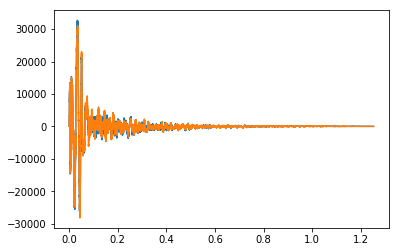

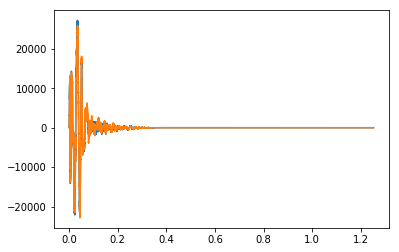

/Users/sam/Code/ai-audio-engineer/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


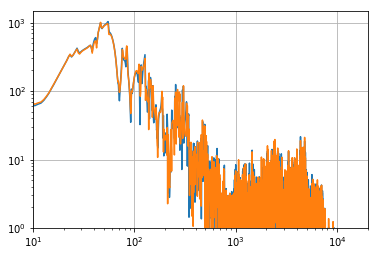

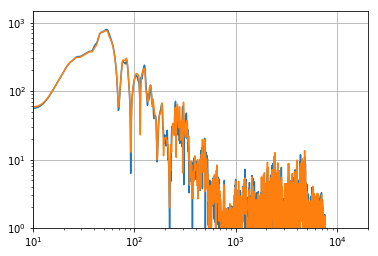

In [293]:
tf = sox.Transformer()
tf.preview(FILE)
tf.compand(attack_time=0.05, decay_time=0.1, soft_knee_db=6.0, tf_points=[(-50, -200), (-20, -40), (0, 0)])
tf.preview(FILE)
success = tf.build(FILE, OFILE)

t_plot(FILE)
t_plot(OFILE)
f_plot(FILE)
f_plot(OFILE)

output_file: ./processed.wav already exists and will be overwritten on build
/Users/sam/Code/ai-audio-engineer/venv/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


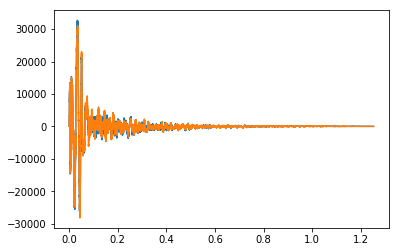

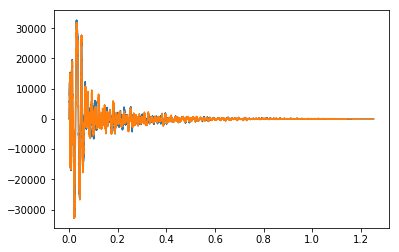

/Users/sam/Code/ai-audio-engineer/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


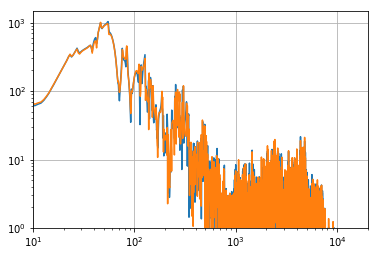

In [292]:
tf = sox.Transformer()
tf.preview(FILE)
tf.equalizer(70, 7.0, 10.0)
tf.equalizer(4000, 2.0, -50.0)
tf.equalizer(4000, 6.0, 70.0)
tf.preview(FILE)
success = tf.build(FILE, OFILE)

t_plot(FILE)
t_plot(OFILE)
f_plot(FILE)
f_plot(OFILE)

output_file: ./processed.wav already exists and will be overwritten on build
/Users/sam/Code/ai-audio-engineer/venv/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


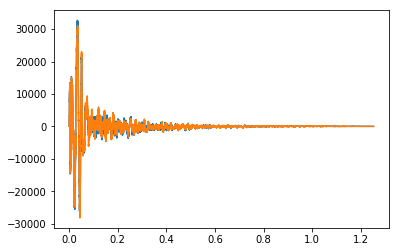

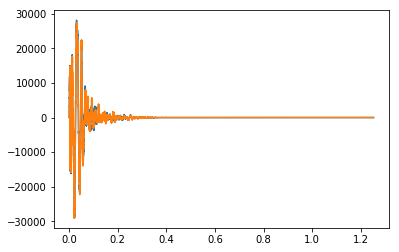

/Users/sam/Code/ai-audio-engineer/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


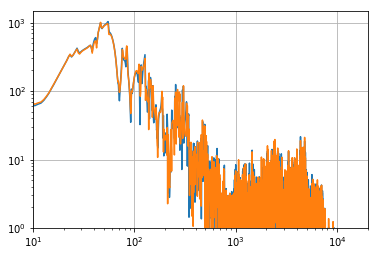

In [291]:
tf = sox.Transformer()
tf.preview(FILE)
tf.equalizer(70, 7.0, 10.0)
tf.equalizer(4000, 2.0, -50.0)
tf.equalizer(4000, 6.0, 70.0)
tf.compand(attack_time=0.05, decay_time=0.1, soft_knee_db=6.0, tf_points=[(-50, -200), (-20, -40), (0, 0)])
tf.preview(FILE)
success = tf.build(FILE, OFILE)

t_plot(FILE)
t_plot(OFILE)
f_plot(FILE)
f_plot(OFILE)

In [280]:
# tf = sox.Transformer()
# print(tf.stat(FILE))
# print(tf.stats(FILE))

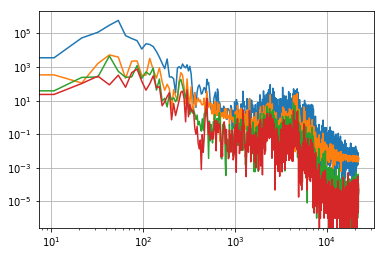

In [151]:
tf = sox.Transformer()
spectrum = np.array(tf.power_spectrum(FILE))
for i in range(4):
    plt.loglog(spectrum[2048*i:2048*(i+1),0], spectrum[2048*i:2048*(i+1),1])
plt.grid(True)
tf.preview(FILE)